In [132]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma

In [134]:
def solve_U(U, b):
    """
    Solve systems Ux_i=b_i for x_i with U upper triangular, i=1,2,...,k

    :param U: an mxm-dimensional numpy array, assumed upper triangular
    :param b: an mxk-dimensional numpy array, with ith column containing 
       b_i
    :return x: an mxk-dimensional numpy array, with ith column containing 
       the solution x_i

    """
    m,n = U.shape
    x = b.copy()
    ## if this is only 1, transform vector into a interpretable matrix
    if len(x.shape) == 1:
        x = x.reshape((n,1)) 

    
    if U.diagonal().prod() == 0:
        return 'non invertible matrix'
     
    x[n-1,:] = (1/U[n-1,n-1])*x[n-1,:] 

    for i in reversed(range (0,n-1)):
        x[i,:] =  (1/U[i,i])*(x[i,:] - np.dot( U[i, i+1:n],x[i+1:n]) )
    return x   


def householder_solve(A, b):
    """
    Given a real mxm matrix A, use the Householder transformation to solve
    Ax_i=b_i, i=1,2,...,k.

    :param A: an mxm-dimensional numpy array
    :param b: an mxk-dimensional numpy array whose columns are the \
    right-hand side vectors b_1,b_2,...,b_k.

    :return x: an mxk-dimensional numpy array whose columns are the \
    right-hand side vectors x_1,x_2,...,x_k.
    """
    m, n = A.shape
    Ahat = np.c_[A,b]

    m2,n2 = Ahat.shape

    for k in range(0,n): ## for n columns of A
        x = Ahat[k:m,k] ## subvector extracted from column k to transform into a almost zeros vector
        signo = 1
        if x[0] < 0:
            signo = -1
        e1 = np.eye((m-k), dtype = 'float')[:,0]
        v = signo* e1 * np.linalg.norm(x) + x
        
        v = v / np.linalg.norm(v) 
        
        
        Ahat[k:m,k:n2] = Ahat[k:m,k:n2] - 2 * np.outer(v, v@Ahat[k:m,k:n2] ) 
    
    x = solve_U(Ahat[0:n,0:n],Ahat[0:n,n:n2])
    
    return x




def householder_ls_penalized2(A, b, l):
    """
    Given a real mxn matrix A and an m dimensional vector b, find the
    least squares solution to Ax = b.

    :param A: an mxn-dimensional numpy array
    :param b: an m-dimensional numpy array

    :return x: an n-dimensional numpy array
    """
    m,n = A.shape
    
    if len(b.shape) == 1:
        b.resize((m,1))

    print(b.shape, A.shape)
    
    b2 = np.r_[ b, np.zeros((n,1)) ]
    A2 = np.r_[ A, ma.sqrt(float(l))*np.eye((n)) ]
    print(b2.shape, A2.shape)
    
    x = householder_solve(A2,b2)
    
    print(x.shape)
    
    return x[0:n]


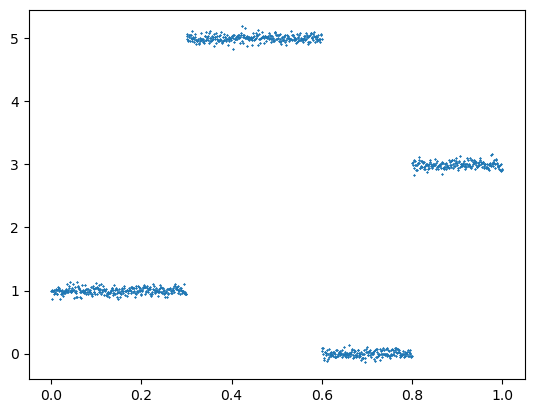

In [136]:
signal = np.loadtxt('noisy_signal.csv')
axis = np.linspace(0, 1, num = len(signal))

fig, plt_s = plt.subplots()
plt_s.plot(axis, signal,'x', markersize = 1)

In [138]:
L = np.eye( len (signal) )
aux = np.c_[np.zeros([len(signal),1]) , np.eye( len (signal))[:,:-1]  ]
print (L-aux)



[[ 1. -1.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]
 [ 0.  0.  0. ...  0.  0.  1.]]


In [140]:
def householder_ls_denoise(b, l):
    """
    Given a real mxn matrix A and an m dimensional vector b, find the
    least squares solution to Ax = b.

    :param A: an mxn-dimensional numpy array
    :param b: an m-dimensional numpy array

    :return x: an n-dimensional numpy array
    """
    A = np.eye( len (b) )
    
    m,n = A.shape
    
    if len(b.shape) == 1:
        b.resize((m,1))

    L =  A - np.c_[np.zeros([len(signal),1]) , np.eye( len (signal))[:,:-1]  ]
    
    b2 = np.r_[ b, np.zeros((n,1)) ]
    A2 = np.r_[ A, ma.sqrt(float(l))*L ]
    print(b2.shape, A2.shape)
    
    x = householder_solve(A2,b2)
    
    print(x.shape)
    
    return x[0:n]


(2000, 1) (2000, 1000)
(1000, 1)
(2000, 1) (2000, 1000)
(1000, 1)
(2000, 1) (2000, 1000)
(1000, 1)
(2000, 1) (2000, 1000)
(1000, 1)


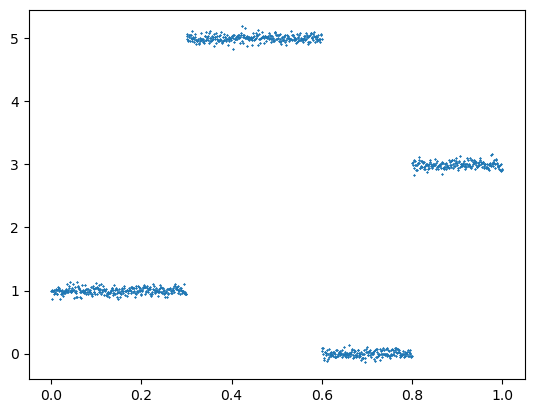

In [142]:
signal = np.loadtxt('noisy_signal.csv')
axis = np.linspace(0, 1, num = len(signal))

fig, plt_s = plt.subplots()
plt_s.plot(axis, signal,'x', markersize = 1)

res_a = householder_ls_denoise(signal.copy(), (999**2) * 0.0001)
res_b = householder_ls_denoise(signal.copy(), (999**2) * 0.0005)
res_c = householder_ls_denoise(signal.copy(), (999**2) * 0.001)



(2000, 1) (2000, 1000)
(1000, 1)


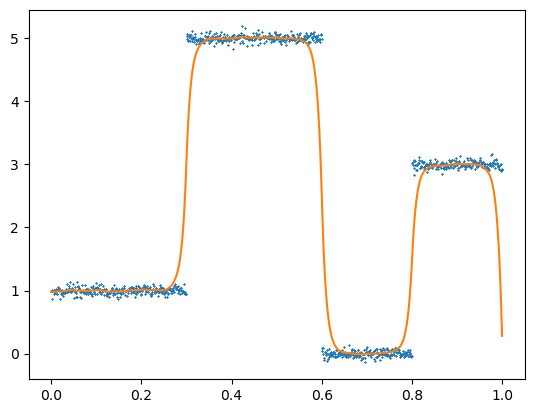

In [161]:
res_d = householder_ls_denoise(signal.copy(), 100)

fig, plt_d = plt.subplots()
plt_d.plot(axis, signal,'x', markersize = 1)
plt_d.plot(axis, res_d)


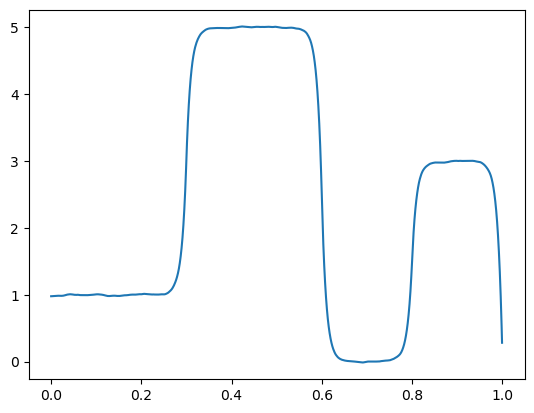

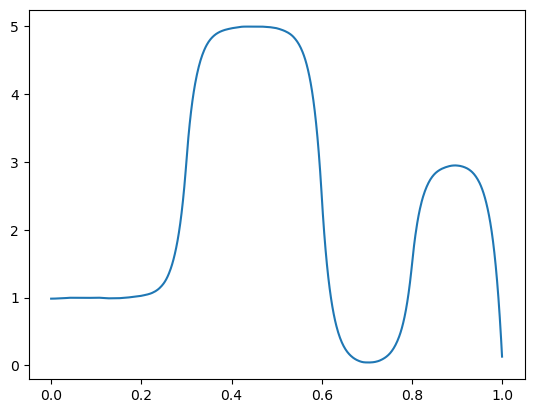

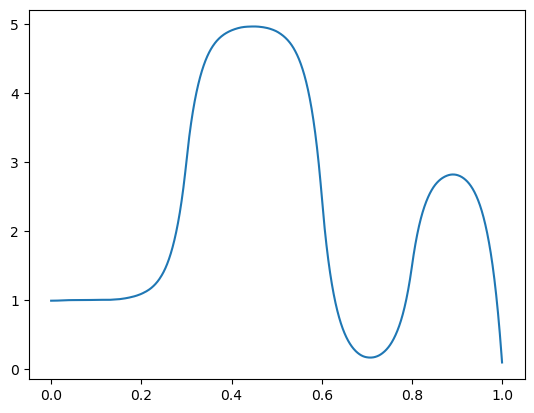

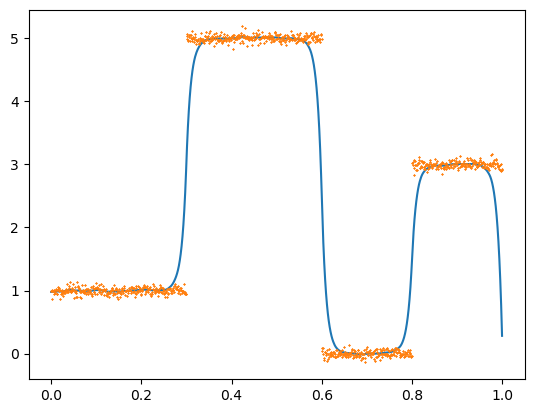

In [144]:
fig, plt_a = plt.subplots()
plt_a.plot(axis, res_a)
##plt_a.plot(axis, signal,'x', markersize = 1)

fig, plt_b = plt.subplots()
plt_b.plot(axis, res_b)
##plt_b.plot(axis, signal,'x', markersize = 1)

fig, plt_c = plt.subplots()
plt_c.plot(axis, res_c)
##plt_c.plot(axis, signal,'x', markersize = 1)



